In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:] # 2번째, 3번째 열만 
y = data.target
feature_names = [name[:-5] for name in data.feature_names[2:]]
print(feature_names)

# 모형 생성 
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="entropy", # 분류품질 기준
                                  max_depth=1,
                                  random_state=0)
dt_model.fit(X,y) # depth가 1이라 성능이 좋지 않을 예정

print(X[102])
test_x = [[5.9,2.1]]
print('예측값 : ',dt_model.predict(test_x))
print(dt_model.classes_)
print(dt_model.predict_proba(test_x))

['petal length', 'petal width']
[5.9 2.1]
예측값 :  [1]
[0 1 2]
[[0.  0.5 0.5]]


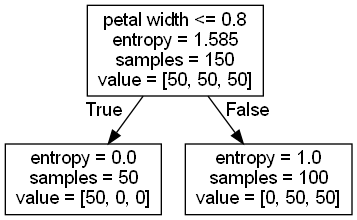

In [3]:
# 분류모형의 시각화 
import io
from sklearn.tree import export_graphviz
import pydot 
from IPython.core.display import Image

def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names=feature_names)